# House Price Prediction #
Team Members: Anjan Shrestha, Balaji Mandava, Byanagari Rohith, Naresh Balla, Bhargav Ram Pushadapu

Group Number: 8

### Import and Packages ###

In [1]:
import pandas as pd
import datetime
import matplotlib.pyplot as plt
import pickle
from sklearn.linear_model import LinearRegression
import math
from sklearn.metrics import mean_squared_error
from sklearn import preprocessing

##  1. Extract Raw dataset

In [2]:
# Read raw data from csv file that has been downloaded from zillow (https://www.zillow.com/research/data/)
raw_df = pd.read_csv('./data/data.csv')

In [3]:
raw_df = raw_df.dropna()

In [4]:
raw_df.tail(5)

,RegionID,SizeRank,RegionName,RegionType,StateName,State,City,Metro,CountyName,2000-01-31,...,2022-03-31,2022-04-30,2022-05-31,2022-06-30,2022-07-31,2022-08-31,2022-09-30,2022-10-31,2022-11-30,2022-12-31
27268,93402,30657,80453,zip,CO,CO,Idledale,"Denver-Aurora-Lakewood, CO",Jefferson County,180688.0,...,641111.0,640020.0,633189.0,622345.0,617256.0,612584.0,606365.0,605751.0,605137.0,605741.0
27295,58873,30657,2722,zip,MA,MA,Fall River,"Providence-Warwick, RI-MA",Bristol County,213275.0,...,521336.0,525717.0,530538.0,538192.0,540326.0,540236.0,536563.0,536228.0,536619.0,534176.0
27310,94938,30657,85362,zip,AZ,AZ,Yarnell,"Prescott Valley-Prescott, AZ",Yavapai County,102905.0,...,238840.0,246532.0,252357.0,254239.0,255305.0,252321.0,250991.0,251880.0,254687.0,254301.0
27315,63622,30657,14592,zip,NY,NY,York,"Rochester, NY",Livingston County,82666.0,...,164557.0,165695.0,168639.0,173041.0,177712.0,180050.0,181006.0,182709.0,184972.0,185200.0
27350,90041,30657,73491,zip,OK,OK,Velma,"Duncan, OK",Stephens County,38409.0,...,95098.0,95633.0,95047.0,95401.0,95610.0,96806.0,97410.0,98084.0,98253.0,97800.0


##  2. Cleaning raw dataset

In [5]:
# Exported to output file named 'cleaned_data.csv' for efficiency
def validate_date(date_text):
        try:
            datetime.datetime.strptime(date_text, '%Y-%m-%d')
            return True
        except ValueError:
            return False

# Make this flag to True only if cleaned csv file needs to be generated
generate_cleaned_file = False

if(generate_cleaned_file):
  # Get all the date column
  date_columns = list(filter(lambda x: validate_date(x), raw_df.columns.to_list()))

  # Create new dataframe
  year_list = []
  month_list = []
  day_list = []
  zip_list = []
  price_list = []
  for date_column in date_columns:
    print(date_column)
    dt = datetime.datetime.strptime(date_column, '%Y-%m-%d')

    for index, row in raw_df.iterrows():
      year_list.append(dt.year)
      month_list.append(dt.month)
      day_list.append(dt.day)
      zip_list.append(row['RegionName'])
      price_list.append(row[date_column])

  # Created cleaned dataframe
  cleaned_df = pd.DataFrame({
      'Year': year_list, 
      'Month': month_list, 
      'Day': day_list, 
      'Zip': zip_list, 
      'Price': price_list})

  # Export to output file
  cleaned_df.to_csv( './data/cleaned_data.csv', index=False)

In [6]:
raw_df.shape

(9182, 285)

In [7]:
cleaned_df = pd.read_csv('./data/cleaned_data.csv')

In [8]:
cleaned_df.shape

(2534232, 5)

In [9]:
cleaned_df.head(5)

,Year,Month,Day,Zip,Price
0,2000,1,31,79936,90334.0
1,2000,1,31,11385,284469.0
2,2000,1,31,60629,131669.0
3,2000,1,31,77084,105893.0
4,2000,1,31,91331,147898.0


## 3. Exploratory Data Analysis

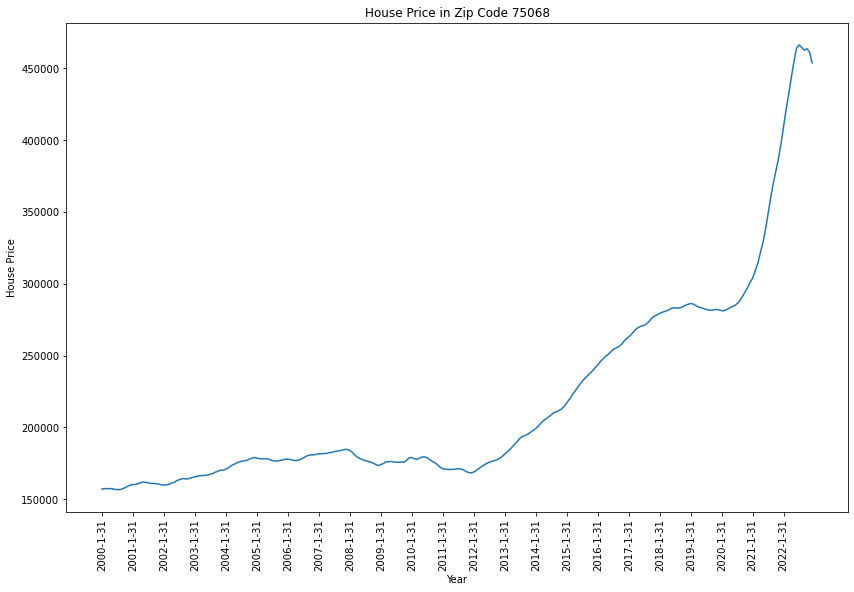

In [10]:
df_75068 = cleaned_df[cleaned_df['Zip'] == 75068]

x = df_75068['Year'].astype(str) + '-' + df_75068['Month'].astype(str) + '-' + df_75068['Day'].astype(str)
y = df_75068['Price']

plt.figure(figsize=(14, 9))
plt.plot(x,y)
plt.xticks([interval*12 for interval in range(23)], rotation='vertical')
plt.xlabel('Year')
plt.ylabel('House Price')
plt.title('House Price in Zip Code 75068')
plt.show()

## 4. Encoding dataset ##

In [11]:
# Encode Zip Column
zip_encoder = preprocessing.LabelEncoder()
model_df = cleaned_df.copy()
model_df['Zip']= zip_encoder.fit_transform(cleaned_df['Zip'])
model_df

,Year,Month,Day,Zip,Price
0,2000,1,31,7236,90334.0
1,2000,1,31,1422,284469.0
2,2000,1,31,6248,131669.0
3,2000,1,31,7025,105893.0
4,2000,1,31,7927,147898.0
...,...,...,...,...,...
2534227,2022,12,31,7323,605741.0
2534228,2022,12,31,371,534176.0
2534229,2022,12,31,7596,254301.0
2534230,2022,12,31,2094,185200.0


In [12]:
# Encode Zip Column
zip_encoder = preprocessing.LabelEncoder()
model_df = cleaned_df.copy()
model_df['Zip']= zip_encoder.fit_transform(cleaned_df['Zip'])
model_df

,Year,Month,Day,Zip,Price
0,2000,1,31,7236,90334.0
1,2000,1,31,1422,284469.0
2,2000,1,31,6248,131669.0
3,2000,1,31,7025,105893.0
4,2000,1,31,7927,147898.0
...,...,...,...,...,...
2534227,2022,12,31,7323,605741.0
2534228,2022,12,31,371,534176.0
2534229,2022,12,31,7596,254301.0
2534230,2022,12,31,2094,185200.0


## 5. Split Data into Train and Test ##

In [13]:
train_index = 0.8 * cleaned_df.shape[0]
train_data = cleaned_df[:int(train_index)]
test_data = cleaned_df[int(train_index):]

X_train = train_data.drop('Price', axis=1)
y_train = train_data['Price']
X_test = test_data.drop('Price', axis=1)
y_test = test_data['Price']

In [14]:
X_train

,Year,Month,Day,Zip
0,2000,1,31,79936
1,2000,1,31,11385
2,2000,1,31,60629
3,2000,1,31,77084
4,2000,1,31,91331
...,...,...,...,...
2027380,2018,5,31,73141
2027381,2018,5,31,95633
2027382,2018,5,31,42378
2027383,2018,5,31,44626


In [15]:
X_test

,Year,Month,Day,Zip
2027385,2018,5,31,7803
2027386,2018,5,31,14125
2027387,2018,5,31,14719
2027388,2018,5,31,31765
2027389,2018,5,31,33306
...,...,...,...,...
2534227,2022,12,31,80453
2534228,2022,12,31,2722
2534229,2022,12,31,85362
2534230,2022,12,31,14592


## 6. Training the model

In [16]:
model = LinearRegression()
model.fit(X_train.values, y_train.values)

LinearRegression()

## 7. Evaluating the model

In [17]:
rmse = math.sqrt(mean_squared_error(model.predict(X_test.values), y_test.values))

In [18]:
rmse

414380.0050059409

In [19]:
# https://www.statology.org/what-is-a-good-rmse/#:~:text=This%20produces%20a%20value%20between,(%24300%2C000%20%E2%80%93%20%2470%2C000)%20%3D%200.002
normalized_rmse = rmse / (y_test.max() - y_test.min())
normalized_rmse

0.04333641273126498

## 8. Generating trained model to output file

In [20]:
# Output to pickle file
output = {
    'trained_model': model,
    'normalized_rmse': normalized_rmse,
    'zip_encoder': zip_encoder,
    'zipcode_list': cleaned_df['Zip'].unique()
}

with open('./output/output.pickle', 'wb') as f:
    pickle.dump(output, f)
    